In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA



In [130]:
df = pd.read_csv('/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv')

In [131]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [133]:
df.drop(columns=['Id'], inplace=True)


In [134]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [135]:
df.isna().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [136]:
df.duplicated().sum()


0

In [137]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [138]:
df['Area'].value_counts()

Area
4219    5
1752    4
1516    4
4646    4
1743    4
       ..
3948    1
4312    1
2862    1
2475    1
4062    1
Name: count, Length: 1622, dtype: int64

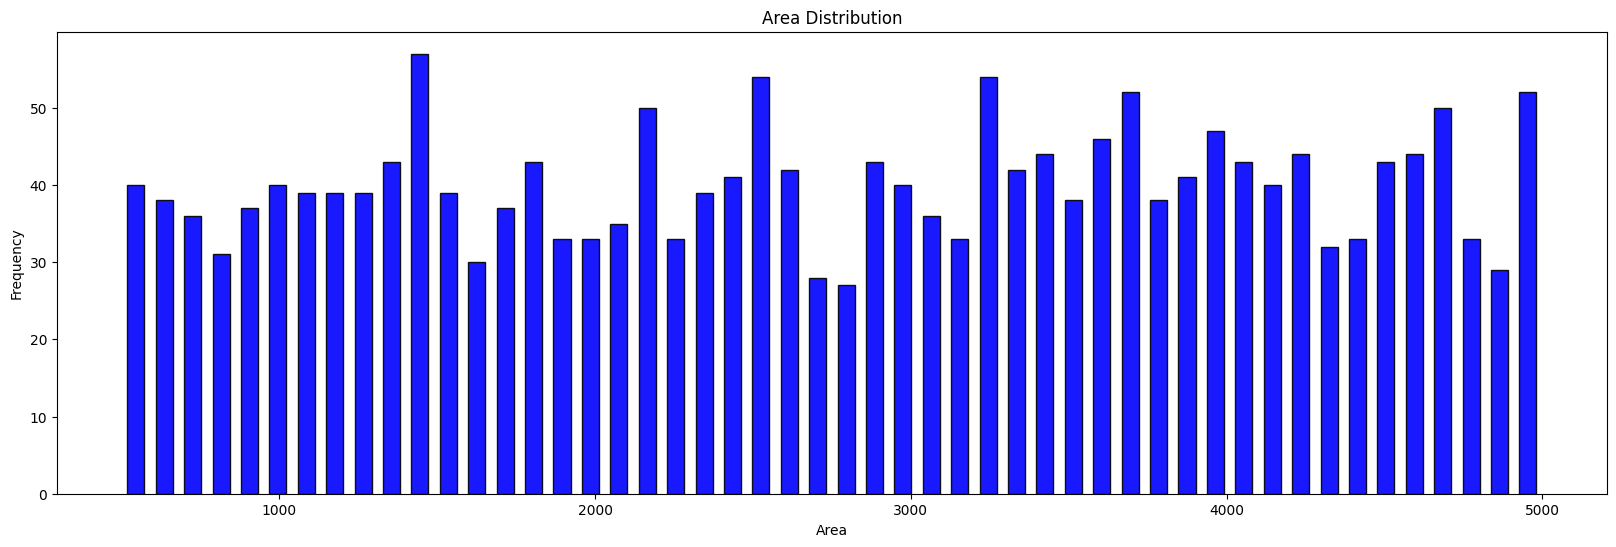

In [139]:
plt.figure(figsize=(20, 6))
plt.hist(df['Area'], bins=50, rwidth=0.6, color='blue', alpha=0.9, edgecolor='black')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')


plt.show()

In [140]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [141]:
df['Bedrooms'].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

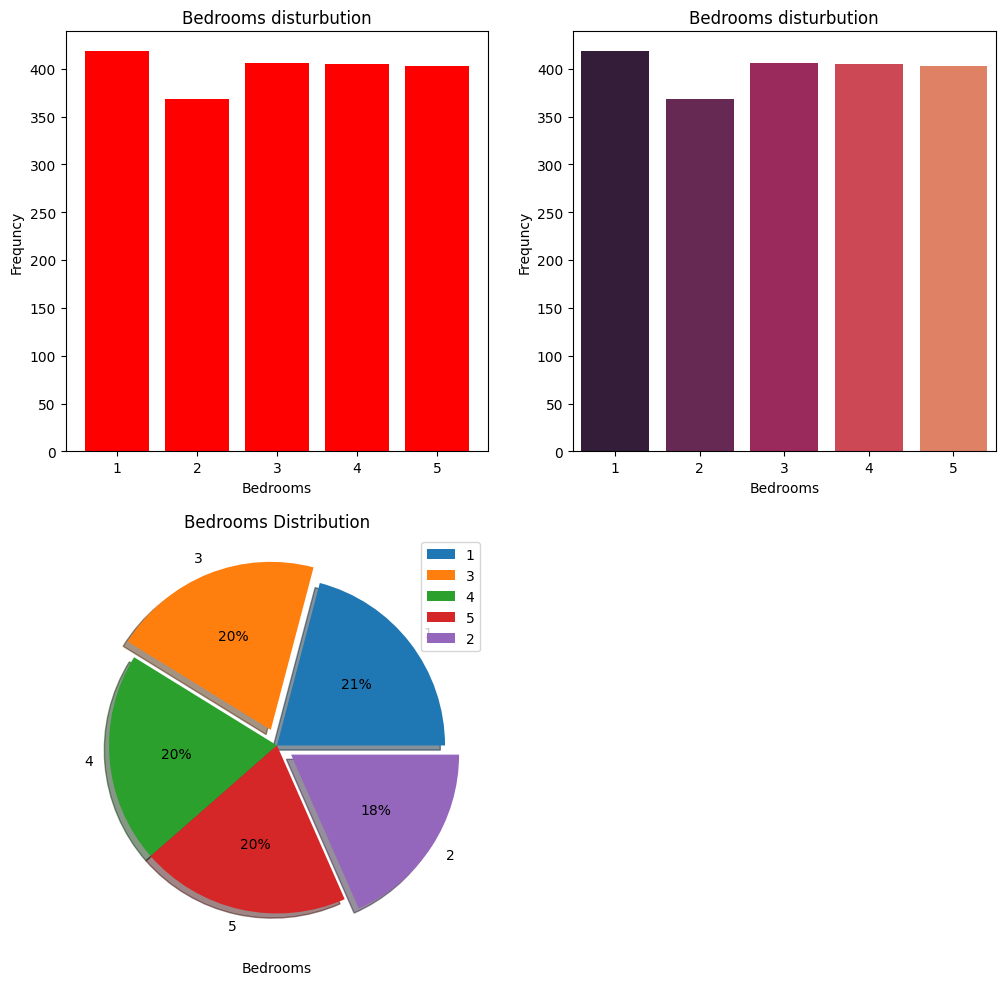

In [142]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(df['Bedrooms'].value_counts().index,df['Bedrooms'].value_counts().values, color='red')
plt.title('Bedrooms disturbution')
plt.xlabel('Bedrooms')
plt.ylabel('Frequncy')

plt.subplot(2,2,2)
sns.barplot(data=df, x=df['Bedrooms'].value_counts().index, y=df['Bedrooms'].value_counts().values, palette=sns.color_palette("rocket"))
plt.title('Bedrooms disturbution')
plt.xlabel('Bedrooms')
plt.ylabel('Frequncy')

plt.subplot(2,2,3)
plt.pie(df['Bedrooms'].value_counts(), explode=[0,0.1,0,0,0.1], labels=df['Bedrooms'].value_counts().index, autopct="%1.0f%%",shadow=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.legend()

plt.show()

In [143]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [144]:
df['Bathrooms'].value_counts()

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64

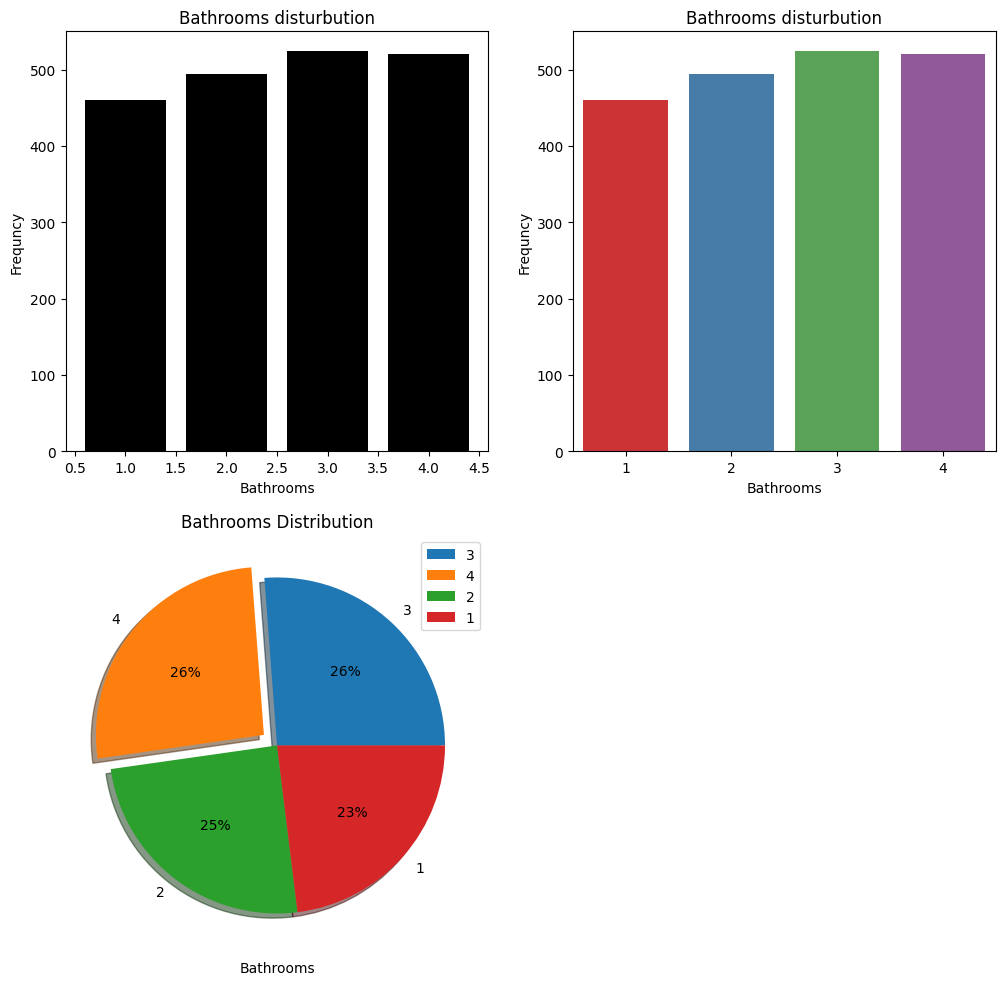

In [145]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(df['Bathrooms'].value_counts().index,df['Bathrooms'].value_counts().values, color='black')
plt.title('Bathrooms disturbution')
plt.xlabel('Bathrooms')
plt.ylabel('Frequncy')

plt.subplot(2,2,2)
sns.barplot(data=df, x=df['Bathrooms'].value_counts().index, y=df['Bathrooms'].value_counts().values, palette=sns.color_palette("Set1"))
plt.title('Bathrooms disturbution')
plt.xlabel('Bathrooms')
plt.ylabel('Frequncy')

plt.subplot(2,2,3)
plt.pie(df['Bathrooms'].value_counts(), explode=[0,0.1,0,0], labels=df['Bathrooms'].value_counts().index, autopct="%1.0f%%",shadow=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.legend()

plt.show()

In [146]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [147]:
df['Floors'].value_counts()

Floors
2    691
1    661
3    648
Name: count, dtype: int64

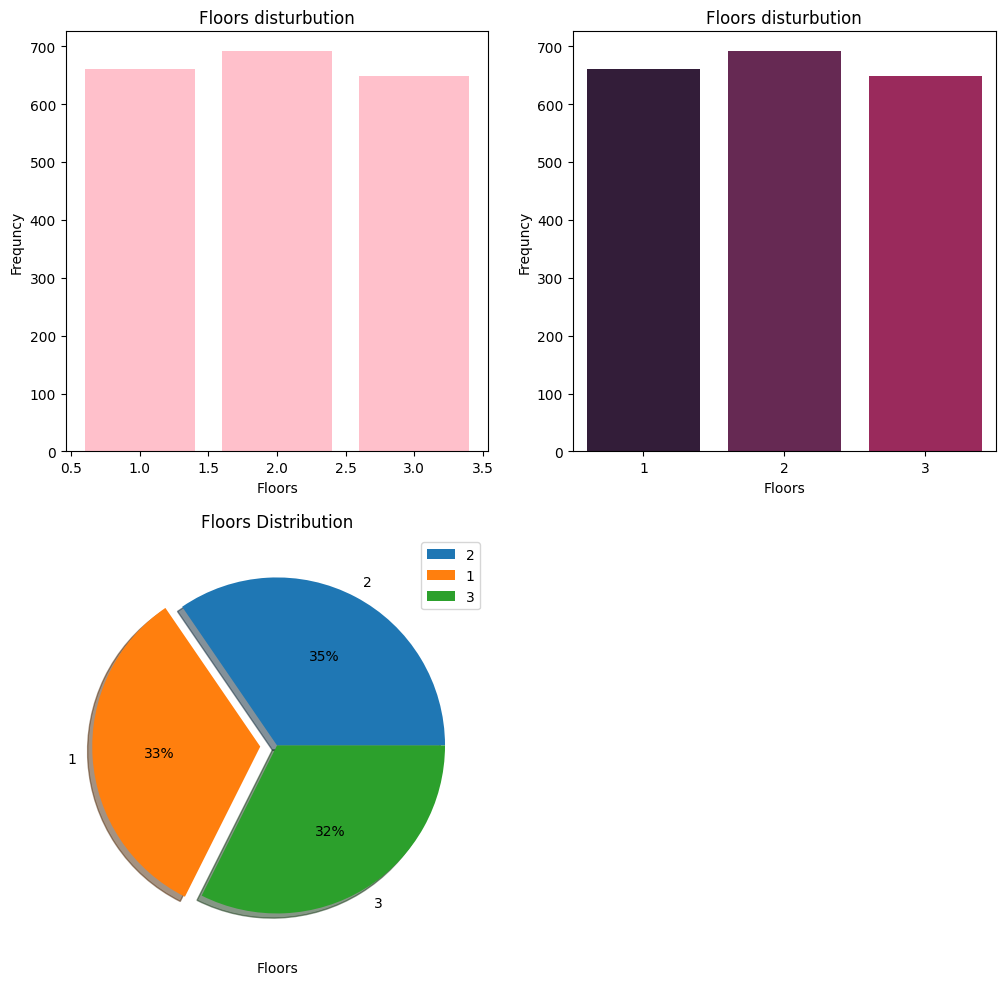

In [148]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(df['Floors'].value_counts().index,df['Floors'].value_counts().values, color='pink')
plt.title('Floors disturbution')
plt.xlabel('Floors')
plt.ylabel('Frequncy')

plt.subplot(2,2,2)
sns.barplot(data=df, x=df['Floors'].value_counts().index, y=df['Floors'].value_counts().values, palette=sns.color_palette("rocket"))
plt.title('Floors disturbution')
plt.xlabel('Floors')
plt.ylabel('Frequncy')

plt.subplot(2,2,3)
plt.pie(df['Floors'].value_counts(), explode=[0,0.1,0], labels=df['Floors'].value_counts().index, autopct="%1.0f%%",shadow=True)
plt.title('Floors Distribution')
plt.xlabel('Floors')
plt.legend()

plt.show()

In [149]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [150]:
df['YearBuilt'].value_counts()

YearBuilt
2005    27
2002    26
1901    25
1981    24
1938    23
        ..
1939    11
1944    10
1950     9
1994     7
2016     6
Name: count, Length: 124, dtype: int64

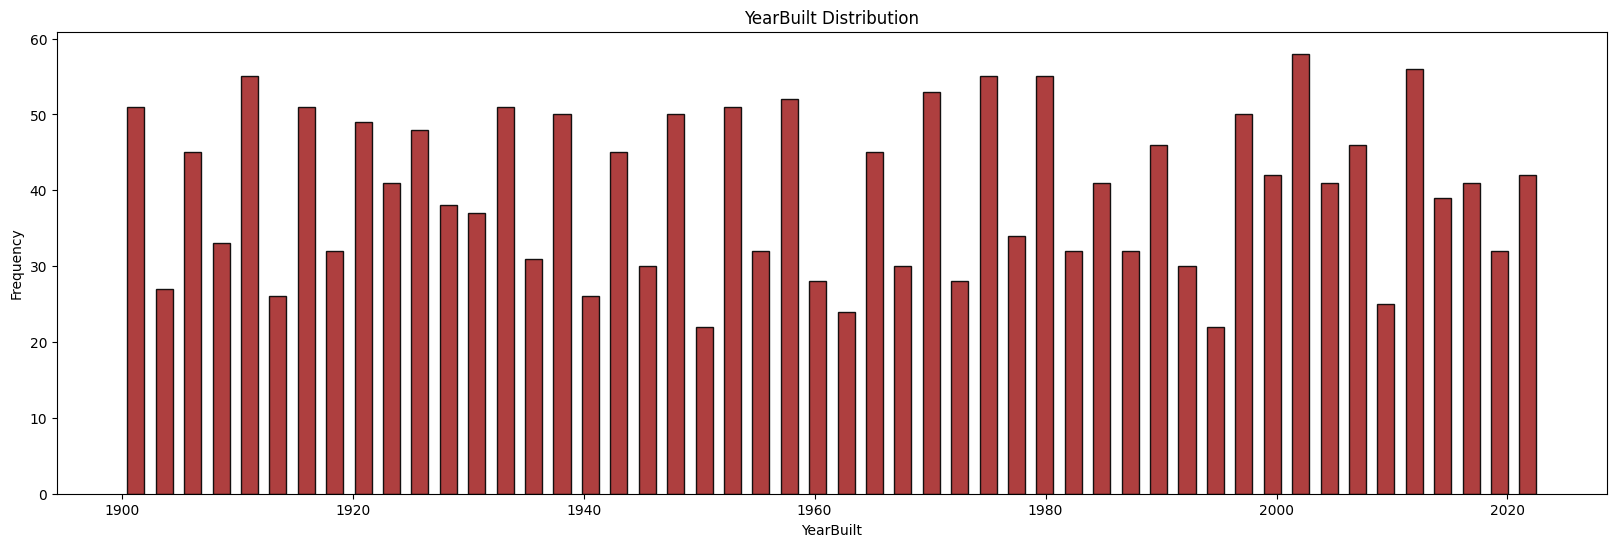

In [151]:
plt.figure(figsize=(20, 6))
plt.hist(df['YearBuilt'], bins=50, rwidth=0.6, color='brown', alpha=0.9, edgecolor='black')
plt.title('YearBuilt Distribution')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')


plt.show()

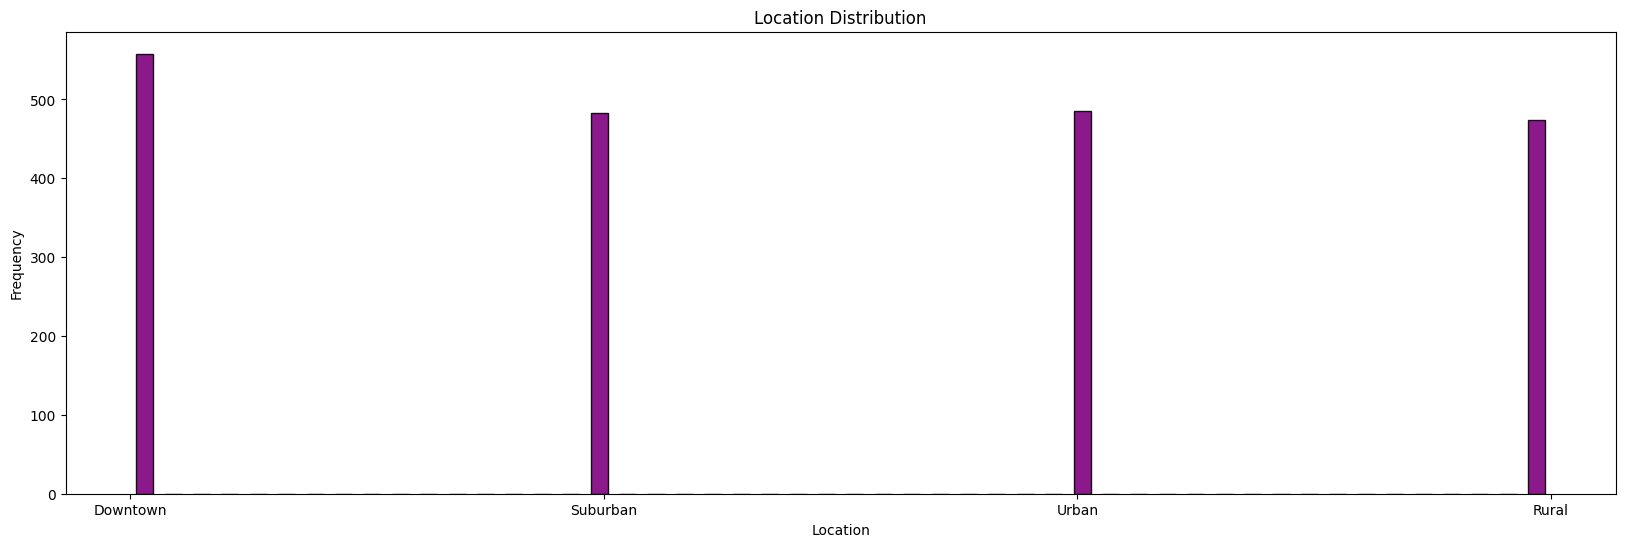

In [152]:
plt.figure(figsize=(20, 6))
plt.hist(df['Location'], bins=50, rwidth=0.6, color='purple', alpha=0.9, edgecolor='black')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Frequency')


plt.show()

In [153]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [154]:
df['Condition'].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

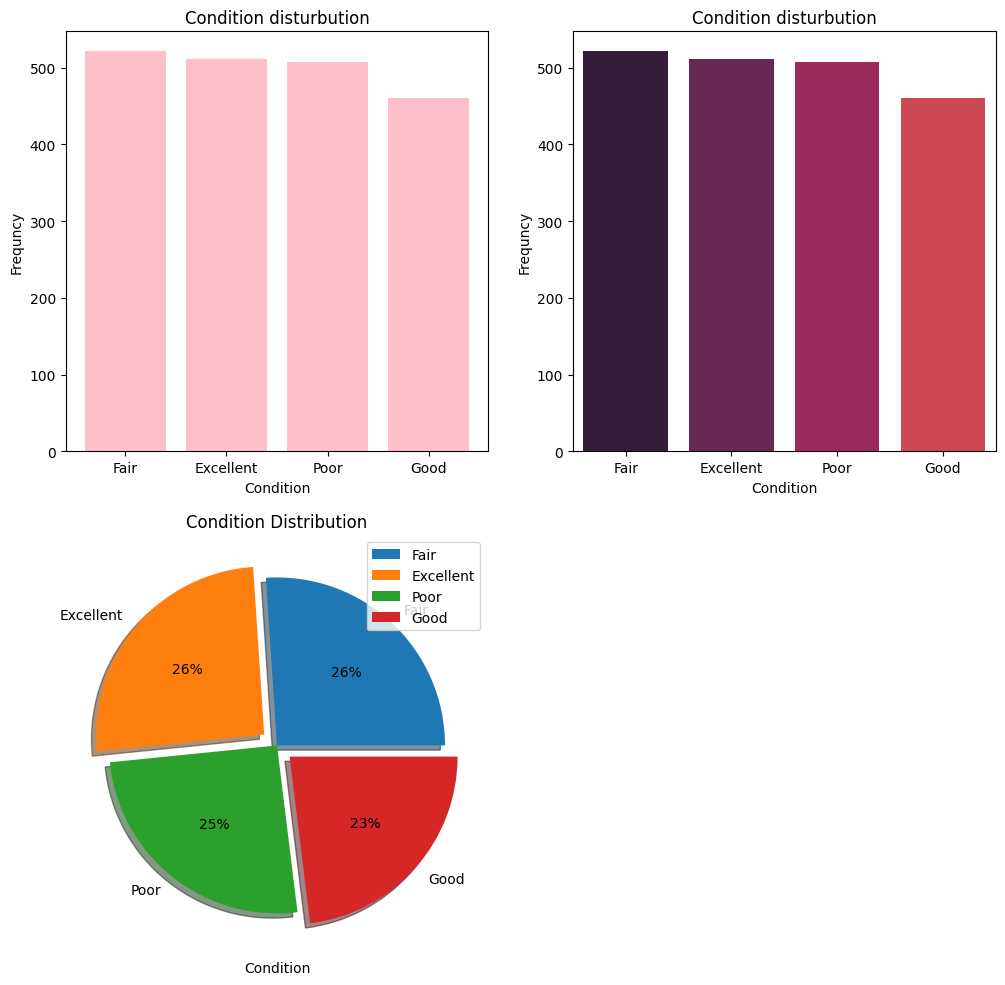

In [155]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(df['Condition'].value_counts().index,df['Condition'].value_counts().values, color='pink')
plt.title('Condition disturbution')
plt.xlabel('Condition')
plt.ylabel('Frequncy')

plt.subplot(2,2,2)
sns.barplot(data=df, x=df['Condition'].value_counts().index, y=df['Condition'].value_counts().values, palette=sns.color_palette("rocket"))
plt.title('Condition disturbution')
plt.xlabel('Condition')
plt.ylabel('Frequncy')

plt.subplot(2,2,3)
plt.pie(df['Condition'].value_counts(), explode=[0,0.1,0,0.1], labels=df['Condition'].value_counts().index, autopct="%1.0f%%",shadow=True)
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.legend()

plt.show()

In [156]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [157]:
df['Garage'].value_counts()

Garage
No     1038
Yes     962
Name: count, dtype: int64

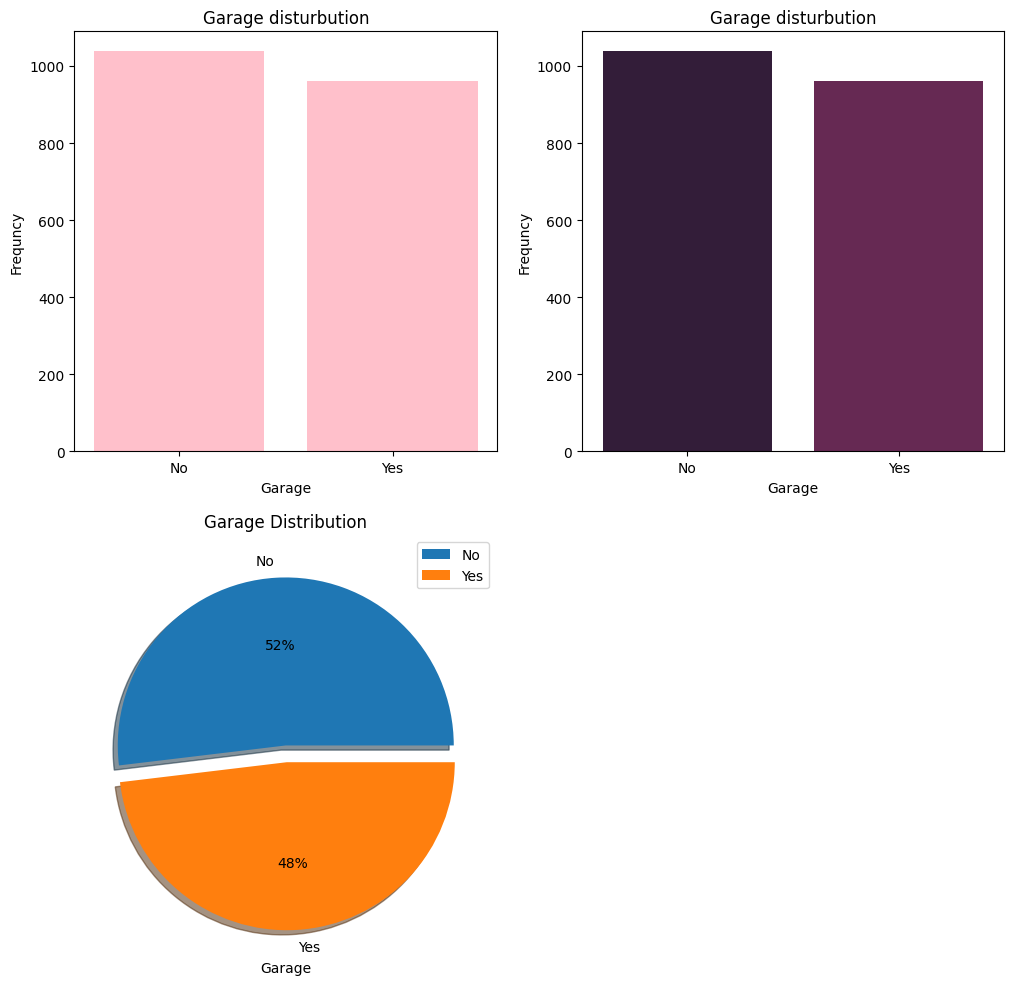

In [158]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(df['Garage'].value_counts().index,df['Garage'].value_counts().values, color='pink')
plt.title('Garage disturbution')
plt.xlabel('Garage')
plt.ylabel('Frequncy')

plt.subplot(2,2,2)
sns.barplot(data=df, x=df['Garage'].value_counts().index, y=df['Garage'].value_counts().values, palette=sns.color_palette("rocket"))
plt.title('Garage disturbution')
plt.xlabel('Garage')
plt.ylabel('Frequncy')

plt.subplot(2,2,3)
plt.pie(df['Garage'].value_counts(), explode=[0,0.1], labels=df['Garage'].value_counts().index, autopct="%1.0f%%",shadow=True)
plt.title('Garage Distribution')
plt.xlabel('Garage')
plt.legend()

plt.show()

In [159]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [160]:
df['Price'].value_counts()

Price
959222    2
149919    1
135687    1
386433    1
77597     1
         ..
536160    1
558350    1
81817     1
55310     1
482525    1
Name: count, Length: 1999, dtype: int64

In [161]:
df.shape

(2000, 9)

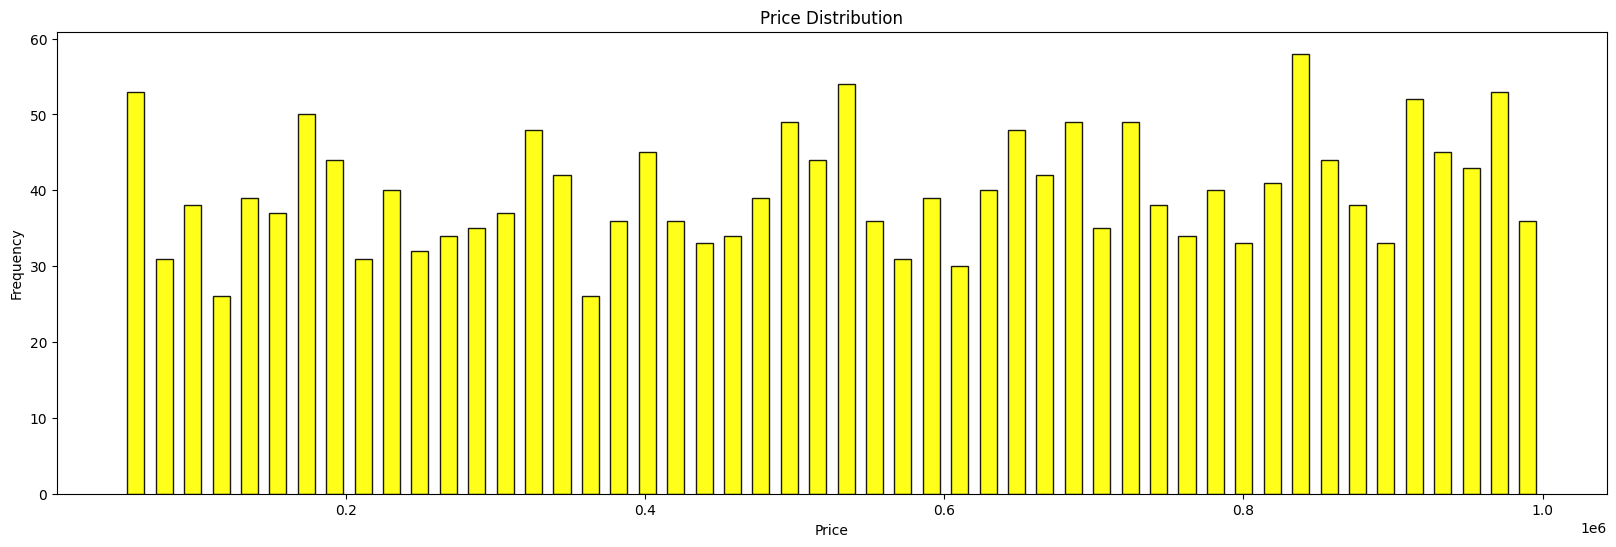

In [162]:
plt.figure(figsize=(20, 6))
plt.hist(df['Price'], bins=50, rwidth=0.6, color='yellow', alpha=0.9, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.show()

In [163]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


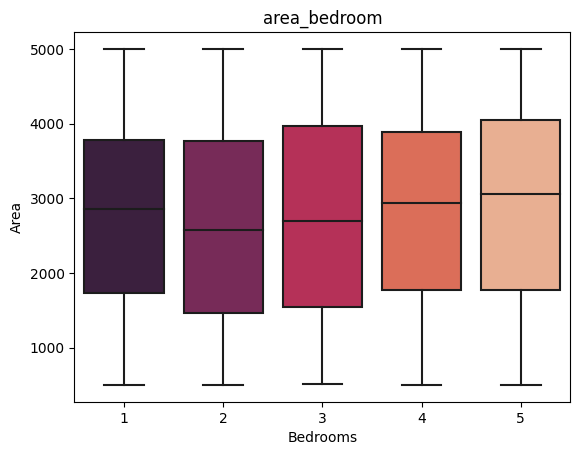

In [164]:
area_bedroom=df.groupby(['Area'])['Bedrooms'].value_counts()
area_bedroom
sns.boxplot(x='Bedrooms', y='Area', data=df,palette='rocket')
plt.title("area_bedroom")
plt.show()

In [165]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


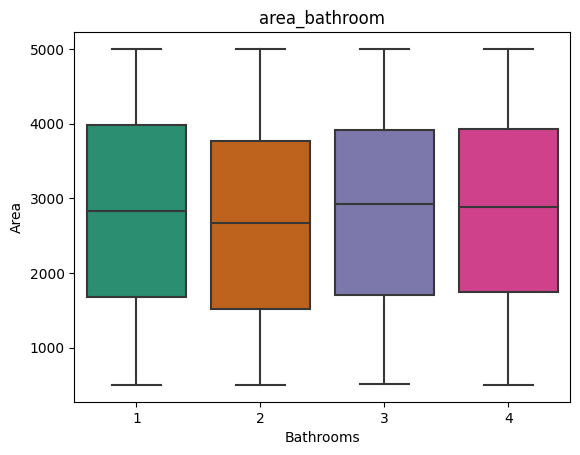

In [166]:
area_bathroom=df.groupby(['Area'])['Bathrooms'].value_counts()
area_bathroom
sns.boxplot(x='Bathrooms', y='Area', data=df,palette='Dark2')
plt.title("area_bathroom")
plt.show()

In [167]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


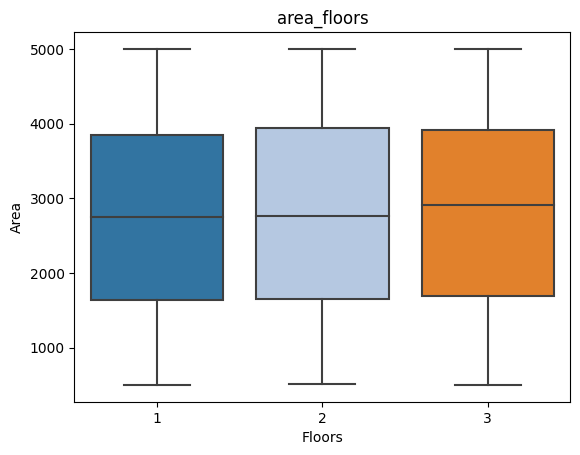

In [168]:
area_floors=df.groupby(['Area'])['Floors'].value_counts()
area_floors
sns.boxplot(x='Floors', y='Area', data=df,palette="tab20")
plt.title("area_floors")
plt.show()

In [169]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [170]:
df.groupby(['Area'])['YearBuilt'].value_counts()

Area  YearBuilt
501   1905         1
      1955         1
502   1909         1
503   2012         1
504   1925         1
                  ..
4995  1925         1
4996  1943         1
      2005         1
4997  1918         1
4999  1967         1
Name: count, Length: 1996, dtype: int64

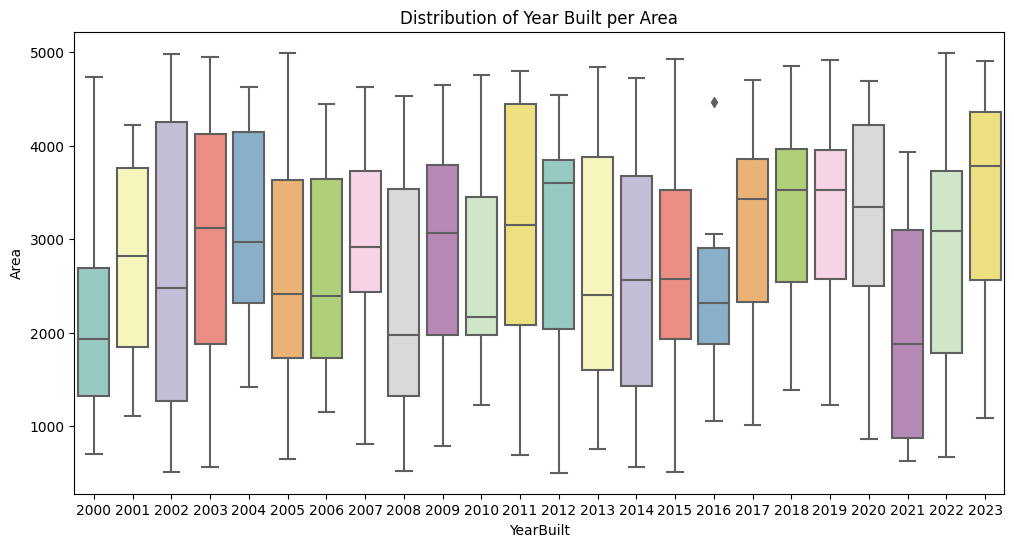

In [171]:
area_year = df[df['YearBuilt'] >= 2000]
area_year
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearBuilt', y='Area', data=area_year, palette="Set3")
plt.title("Distribution of Year Built per Area")
plt.show()


In [172]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [173]:
df.groupby(['Area'])['Location'].value_counts()

Area  Location
501   Rural       1
      Suburban    1
502   Urban       1
503   Suburban    1
504   Downtown    1
                 ..
4995  Urban       1
4996  Downtown    1
      Urban       1
4997  Urban       1
4999  Downtown    1
Name: count, Length: 1900, dtype: int64

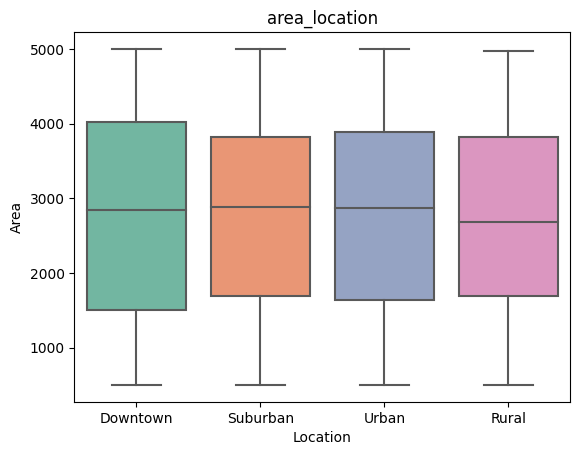

In [174]:
area_location=df.groupby(['Area'])['Location'].value_counts()
area_location
sns.boxplot(x='Location', y='Area', data=df,palette="Set2")
plt.title("area_location")
plt.show()

In [175]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [176]:
df.groupby(['Area'])['Condition'].value_counts()

Area  Condition
501   Good         1
      Poor         1
502   Poor         1
503   Poor         1
504   Fair         1
                  ..
4994  Poor         1
4995  Good         1
4996  Fair         2
4997  Excellent    1
4999  Excellent    1
Name: count, Length: 1879, dtype: int64

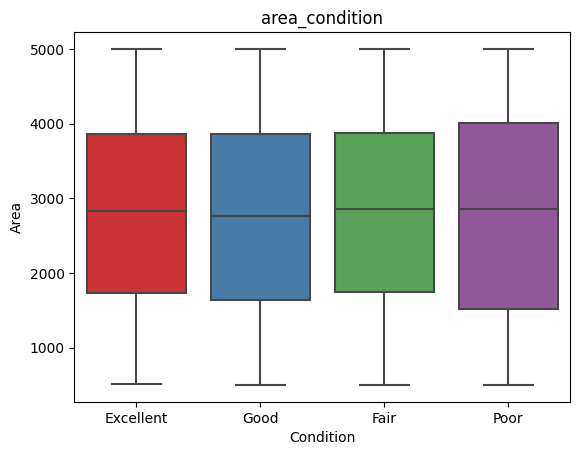

In [177]:
area_condition=df.groupby(['Area'])['Condition'].value_counts()
area_condition
sns.boxplot(x='Condition', y='Area', data=df,palette='Set1')
plt.title("area_condition")
plt.show()

In [178]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [179]:
df.groupby(['Area'])['Garage'].value_counts()

Area  Garage
501   No        2
502   Yes       1
503   No        1
504   No        1
505   Yes       1
               ..
4995  No        1
4996  No        1
      Yes       1
4997  No        1
4999  No        1
Name: count, Length: 1796, dtype: int64

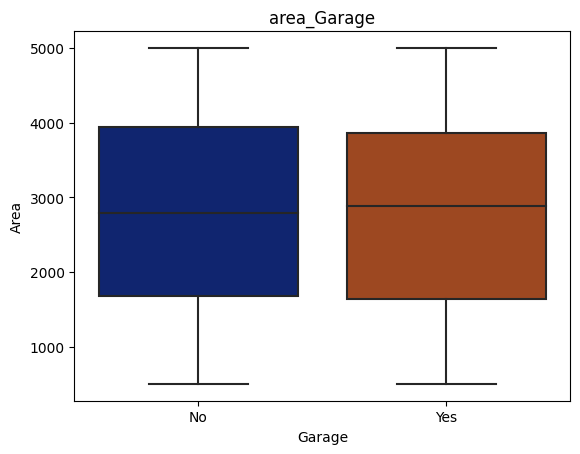

In [180]:
area_Garage=df.groupby(['Area'])['Garage'].value_counts()
area_Garage
sns.boxplot(x='Garage', y='Area', data=df,palette='dark')
plt.title("area_Garage")
plt.show()

In [181]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [182]:
df.groupby(['Area'])['Price'].value_counts()

Area  Price 
501   302990    1
      723832    1
502   184962    1
503   850118    1
504   169574    1
               ..
4995  286028    1
4996  369733    1
      784184    1
4997  286887    1
4999  139460    1
Name: count, Length: 2000, dtype: int64

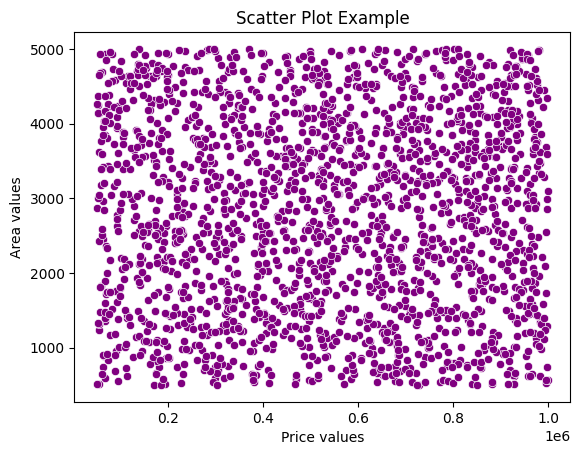

In [183]:
price_area=df.groupby(['Price'])['Area'].value_counts()
price_area
sns.scatterplot(x='Price', y='Area', data=df, color='purple', marker='o')

plt.title('Scatter Plot Example')
plt.xlabel('Price values')
plt.ylabel('Area values')
plt.show()

In [184]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [185]:
df.groupby(['Bedrooms'])['Bathrooms'].value_counts()

Bedrooms  Bathrooms
1         3            125
          4            107
          1             97
          2             89
2         2            108
          4             98
          3             87
          1             75
3         3            108
          2            100
          1             99
          4             99
4         4            112
          3            103
          2            101
          1             89
5         4            105
          1            101
          3            101
          2             96
Name: count, dtype: int64

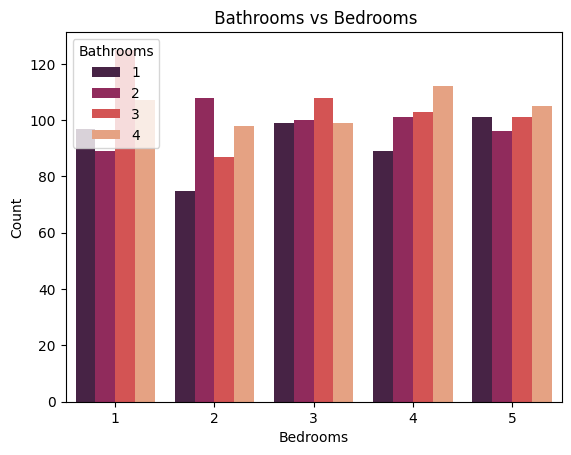

In [186]:
bedroom_bathroom=df.groupby(['Bedrooms'])['Bathrooms'].value_counts() 
bedroom_bathroom
sns.countplot(data=df, x='Bedrooms', hue='Bathrooms', palette='rocket')
plt.title(" Bathrooms vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.legend(title="Bathrooms")
plt.show()


In [187]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [188]:
df.groupby(['Bedrooms'])['YearBuilt'].value_counts()

Bedrooms  YearBuilt
1         1901         13
          1997         10
          2017          8
          1924          7
          1957          7
                       ..
5         2004          1
          2008          1
          2016          1
          2017          1
          2023          1
Name: count, Length: 608, dtype: int64

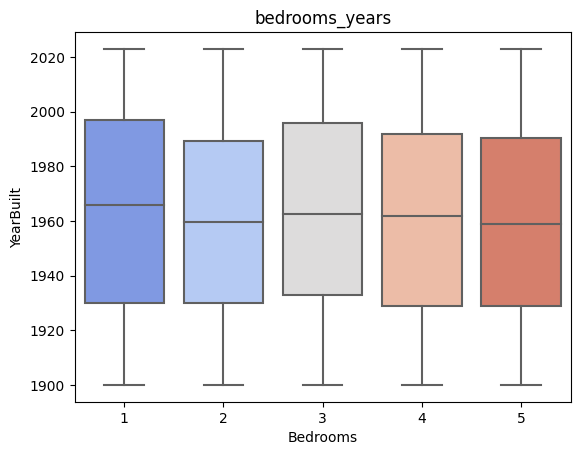

In [189]:
bedrooms_years=df.groupby(['Bedrooms'])['YearBuilt'].value_counts()
bedrooms_years
sns.boxplot(x='Bedrooms', y='YearBuilt', data=df,palette='coolwarm')
plt.title("bedrooms_years")
plt.show()


In [190]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


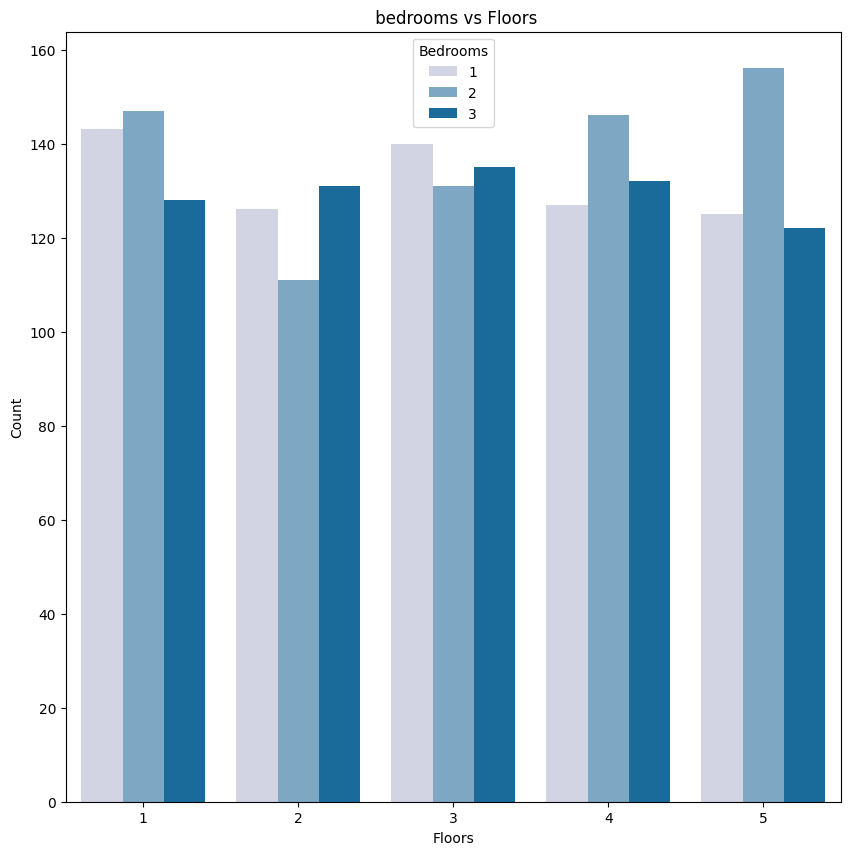

In [191]:
bedrooms_floors=df.groupby(['Bedrooms'])['Floors'].value_counts() 
bedrooms_floors
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Bedrooms', hue='Floors', palette='PuBu')
plt.title(" bedrooms vs Floors")
plt.xlabel("Floors")
plt.ylabel("Count")
plt.legend(title="Bedrooms")
plt.show()


In [192]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [193]:
df.groupby(['Bedrooms'])['Condition'].value_counts()

Bedrooms  Condition
1         Fair         107
          Excellent    106
          Poor         104
          Good         101
2         Excellent    100
          Poor          91
          Fair          90
          Good          87
3         Fair         108
          Excellent    104
          Poor         104
          Good          90
4         Fair         123
          Poor         102
          Excellent     94
          Good          86
5         Excellent    107
          Poor         106
          Good          97
          Fair          93
Name: count, dtype: int64

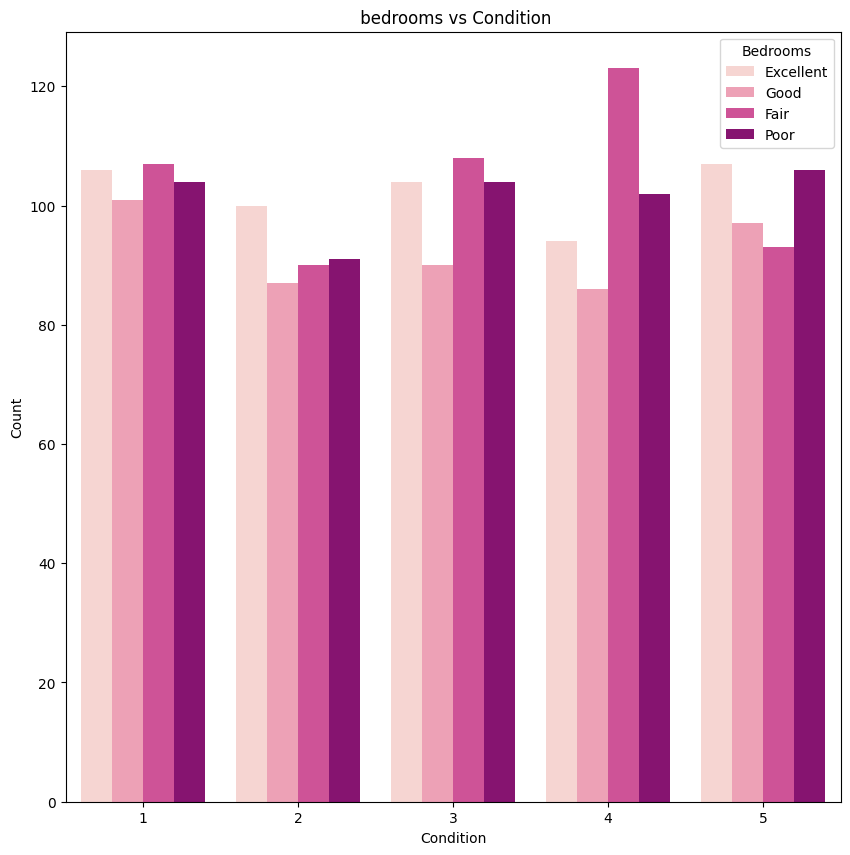

In [194]:
bedrooms_condition=df.groupby(['Bedrooms'])['Condition'].value_counts() 
bedrooms_condition
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Bedrooms', hue='Condition', palette='RdPu')
plt.title(" bedrooms vs Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Bedrooms")
plt.show()


In [195]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


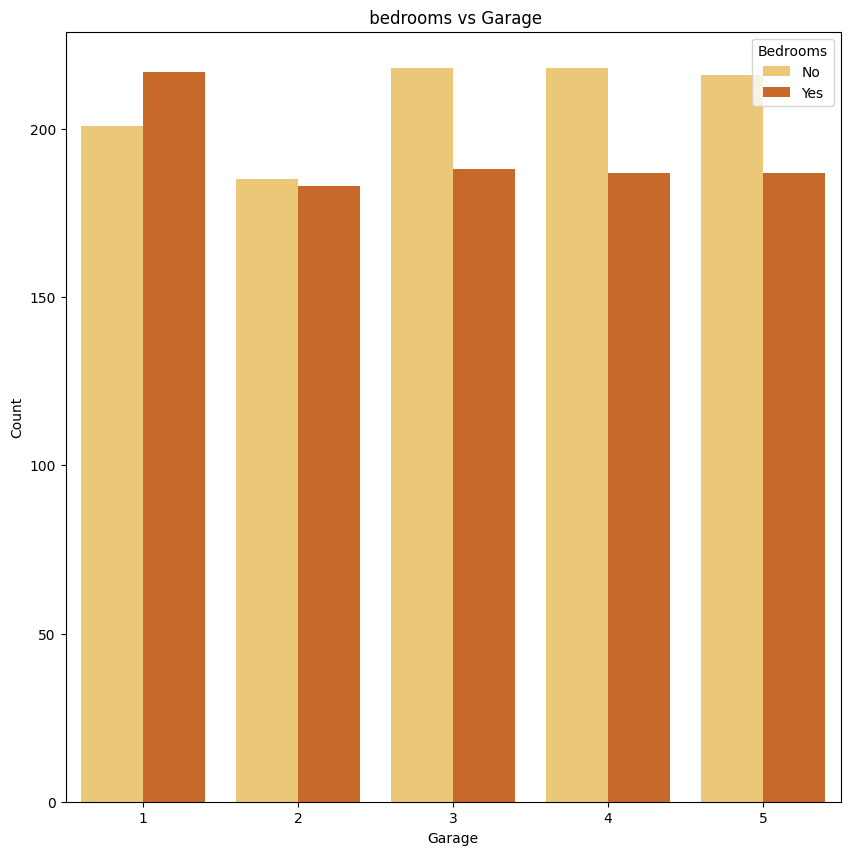

In [196]:
bedrooms_garage=df.groupby(['Bedrooms'])['Garage'].value_counts() 
bedrooms_condition
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Bedrooms', hue='Garage', palette='YlOrBr')
plt.title(" bedrooms vs Garage")
plt.xlabel("Garage")
plt.ylabel("Count")
plt.legend(title="Bedrooms")
plt.show()


In [197]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [198]:
df.groupby(['Bedrooms'])['Price'].value_counts()

Bedrooms  Price 
1         53052     1
          54369     1
          57425     1
          58539     1
          58981     1
                   ..
5         984499    1
          985510    1
          986192    1
          991902    1
          992151    1
Name: count, Length: 2000, dtype: int64

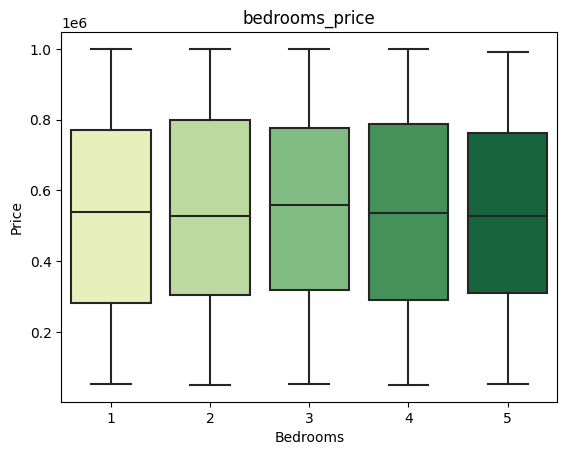

In [199]:
bedrooms_price=df.groupby(['Bedrooms'])['Price'].value_counts()
bedrooms_price
sns.boxplot(x='Bedrooms', y='Price', data=df,palette='YlGn')
plt.title("bedrooms_price")
plt.show()

In [200]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [201]:
df.groupby(['Bathrooms'])['Floors'].value_counts()

Bathrooms  Floors
1          2         170
           1         160
           3         131
2          1         168
           3         165
           2         161
3          3         191
           1         169
           2         164
4          2         196
           1         164
           3         161
Name: count, dtype: int64

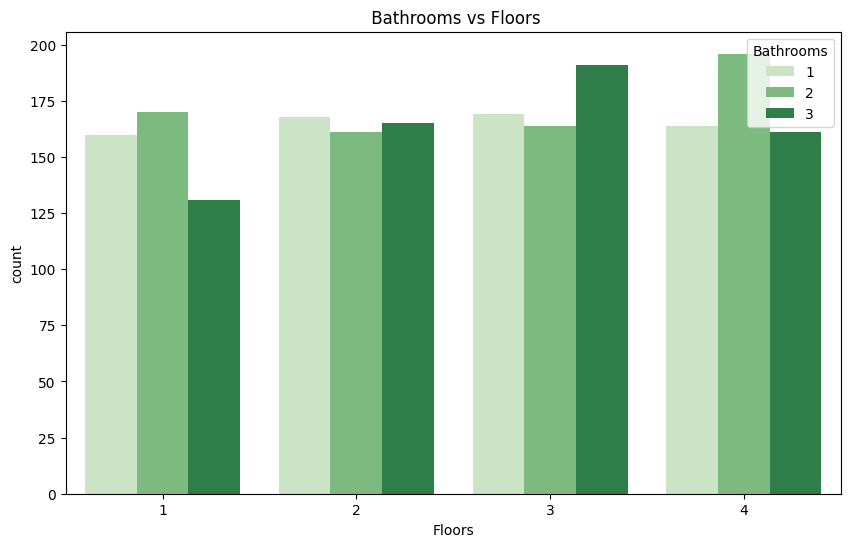

In [202]:
bathrooms_floors=df.groupby(['Bathrooms'])['Floors'].value_counts() 
bedrooms_condition
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Bathrooms', hue='Floors', palette='Greens')
plt.title(" Bathrooms vs Floors")
plt.xlabel("Floors")
plt.ylabel("count")
plt.legend(title="Bathrooms")
plt.show()


In [203]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [204]:
df.groupby(['Bathrooms'])['Condition'].value_counts()

Bathrooms  Condition
1          Fair         129
           Excellent    118
           Poor         116
           Good          98
2          Fair         139
           Excellent    127
           Poor         117
           Good         111
3          Poor         139
           Excellent    136
           Good         131
           Fair         118
4          Fair         135
           Poor         135
           Excellent    130
           Good         121
Name: count, dtype: int64

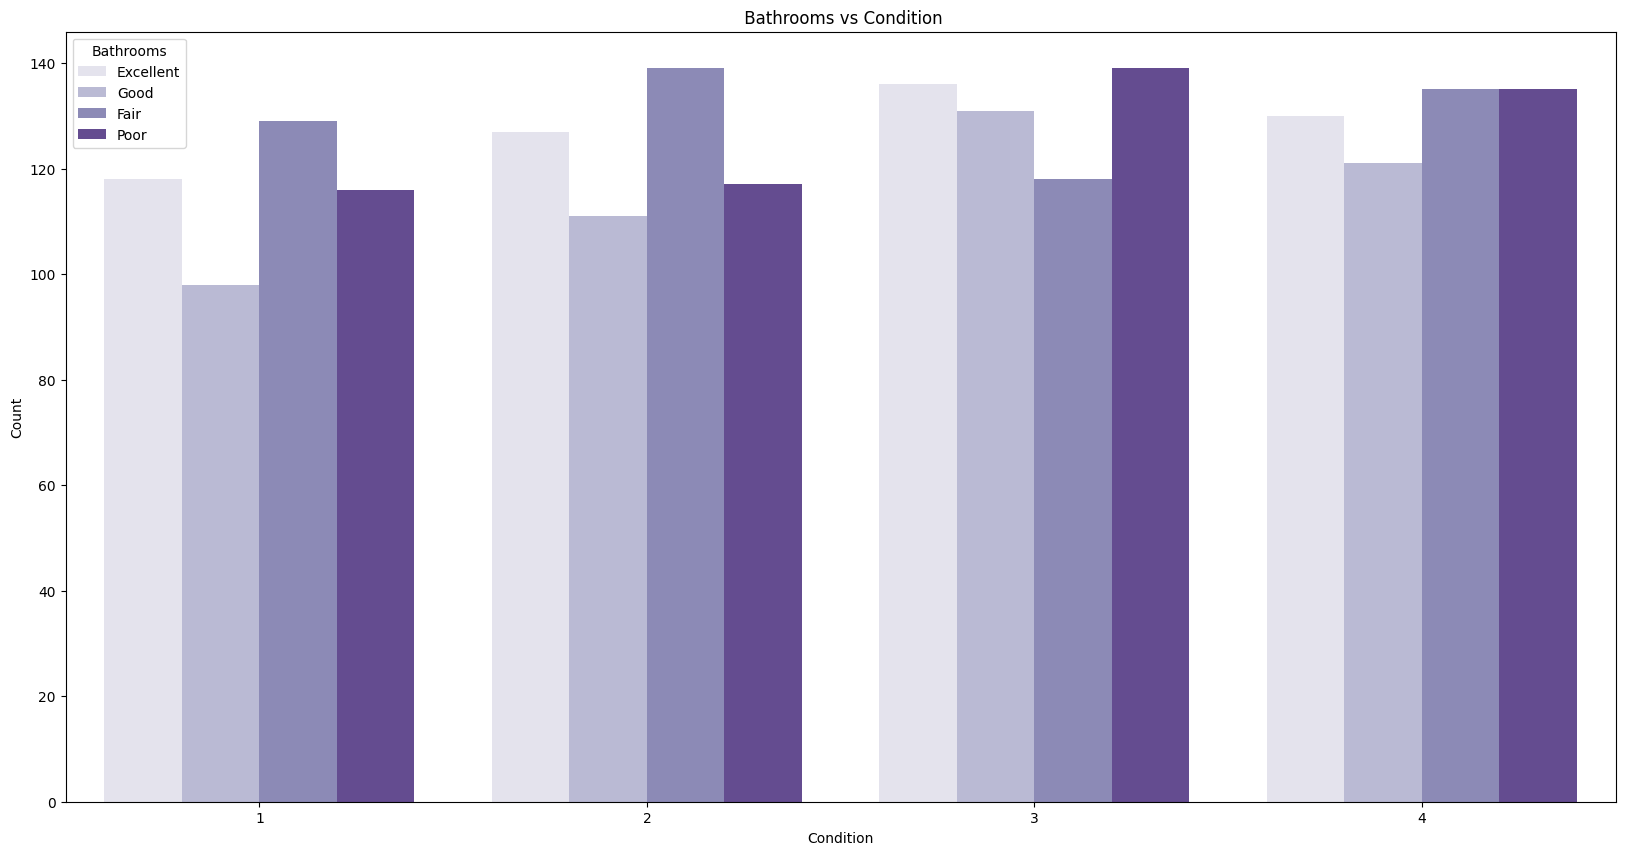

In [205]:
bathrooms_condition=df.groupby(['Bathrooms'])['Condition'].value_counts() 
bedrooms_condition
plt.figure(figsize=(20,10))

sns.countplot(data=df, x='Bathrooms', hue='Condition', palette='Purples')
plt.title(" Bathrooms vs Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Bathrooms")
plt.show()

In [206]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [207]:
df.groupby(['Bathrooms'])['Garage'].value_counts()

Bathrooms  Garage
1          No        236
           Yes       225
2          No        256
           Yes       238
3          No        287
           Yes       237
4          Yes       262
           No        259
Name: count, dtype: int64

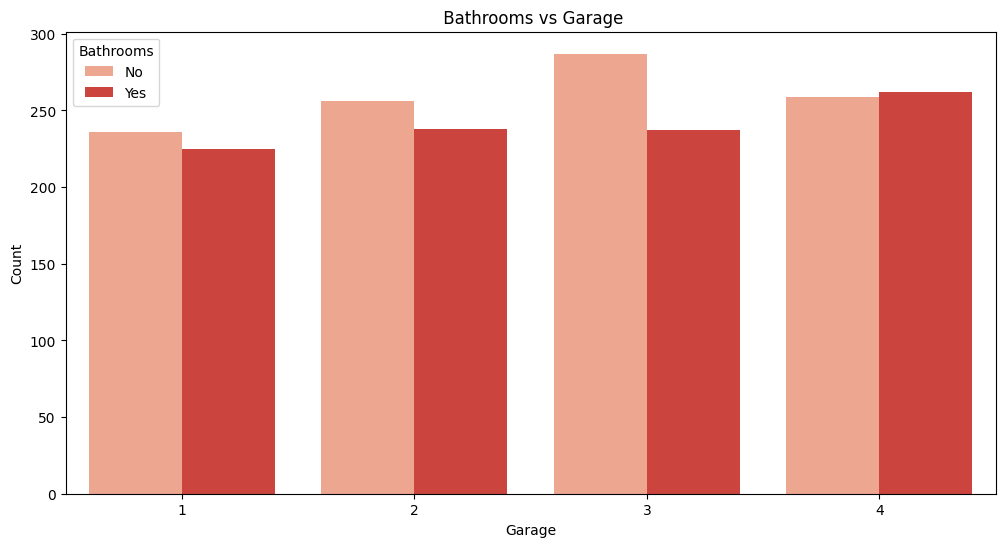

In [208]:
bathrooms_garage=df.groupby(['Bathrooms'])['Garage'].value_counts() 
bedrooms_garage
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Bathrooms', hue='Garage', palette='Reds')
plt.title(" Bathrooms vs Garage")
plt.xlabel("Garage")
plt.ylabel("Count")
plt.legend(title="Bathrooms")
plt.show()

In [209]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [210]:
df.groupby(['Bathrooms'])['Price'].value_counts()

Bathrooms  Price 
1          51082     1
           54369     1
           56611     1
           57176     1
           59765     1
                    ..
4          982478    1
           983332    1
           987126    1
           996357    1
           996931    1
Name: count, Length: 2000, dtype: int64

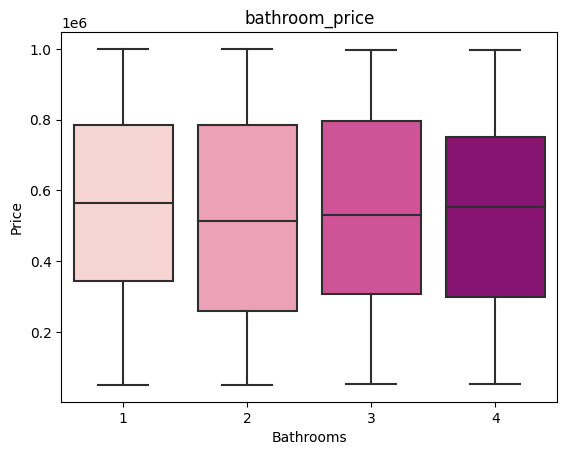

In [211]:
bathrooms_price=df.groupby(['Bathrooms'])['Price'].value_counts()
bathrooms_price
sns.boxplot(x='Bathrooms', y='Price', data=df,palette='RdPu')
plt.title("bathroom_price")
plt.show()

In [212]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [213]:
df.groupby(['Bathrooms'])['YearBuilt'].value_counts()

Bathrooms  YearBuilt
1          2000         8
           2002         8
           2005         8
           1983         7
           1998         7
                       ..
4          1937         1
           1942         1
           1950         1
           1974         1
           2004         1
Name: count, Length: 490, dtype: int64

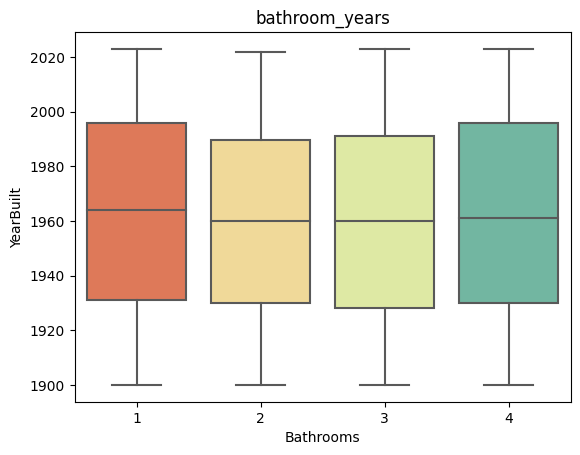

In [214]:
bathrooms_years=df.groupby(['Bathrooms'])['YearBuilt'].value_counts()
bathrooms_years
sns.boxplot(x='Bathrooms', y='YearBuilt', data=df,palette='Spectral')
plt.title("bathroom_years")
plt.show()

In [215]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [216]:
df.groupby(['Floors'])['YearBuilt'].value_counts()

Floors  YearBuilt
1       2000         12
        1924         11
        1908         10
        1909         10
        1925         10
                     ..
3       2010          2
        2018          2
        1955          1
        1991          1
        2023          1
Name: count, Length: 370, dtype: int64

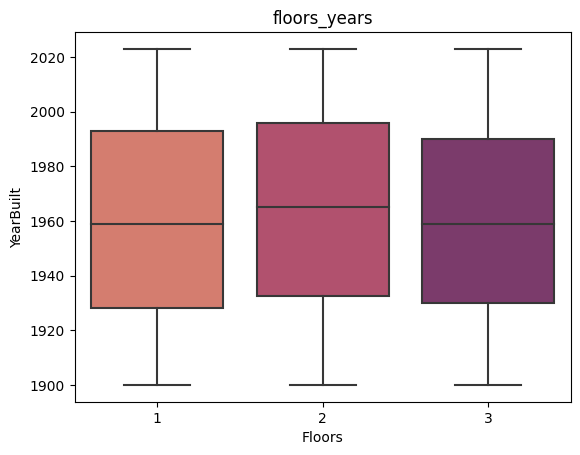

In [217]:
floors_years=df.groupby(['Floors'])['YearBuilt'].value_counts()
floors_years
sns.boxplot(x='Floors', y='YearBuilt', data=df,palette='flare')
plt.title("floors_years")
plt.show()

In [218]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [219]:
df.groupby(['Floors'])['Condition'].value_counts()

Floors  Condition
1       Fair         178
        Excellent    174
        Poor         155
        Good         154
2       Poor         188
        Excellent    179
        Fair         169
        Good         155
3       Fair         174
        Poor         164
        Excellent    158
        Good         152
Name: count, dtype: int64

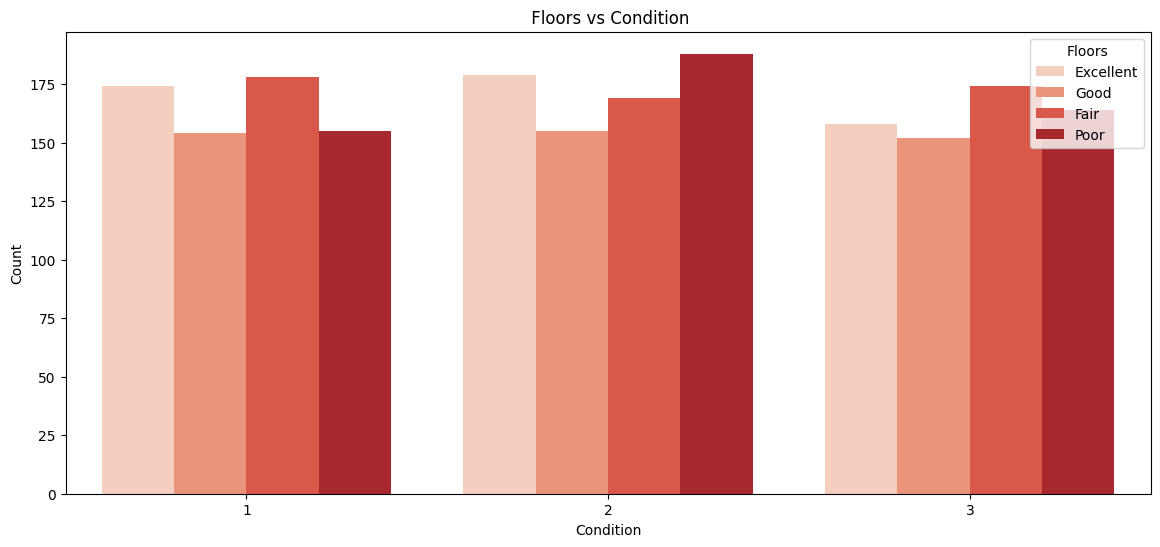

In [220]:
floors_condition=df.groupby(['Floors'])['Condition'].value_counts() 
floors_condition
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Floors', hue='Condition', palette='Reds')
plt.title(" Floors vs Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Floors")
plt.show()

In [221]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [222]:
df.groupby(['Floors'])['Price'].value_counts()

Floors  Price 
1       50005     1
        50064     1
        52024     1
        54369     1
        55310     1
                 ..
3       997226    1
        997719    1
        998084    1
        998128    1
        999656    1
Name: count, Length: 2000, dtype: int64

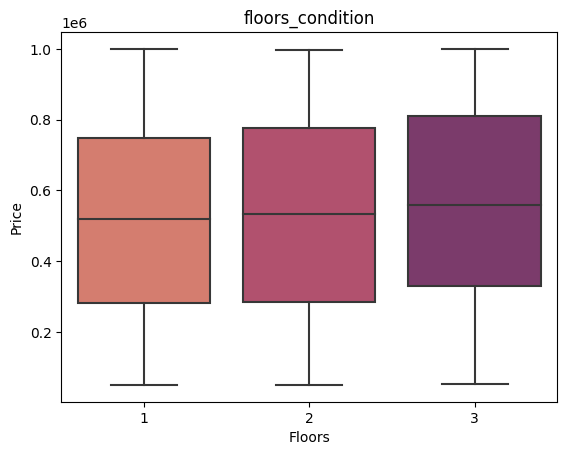

In [223]:
floors_condition=df.groupby(['Floors'])['Price'].value_counts()
floors_condition
sns.boxplot(x='Floors', y='Price', data=df,palette='flare')
plt.title("floors_condition")
plt.show()

In [224]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [225]:
df.groupby(['YearBuilt'])['Price'].value_counts()

YearBuilt  Price 
1900       92103     1
           193092    1
           210094    1
           324348    1
           413309    1
                    ..
2023       813292    1
           866473    1
           892495    1
           903906    1
           959222    1
Name: count, Length: 2000, dtype: int64

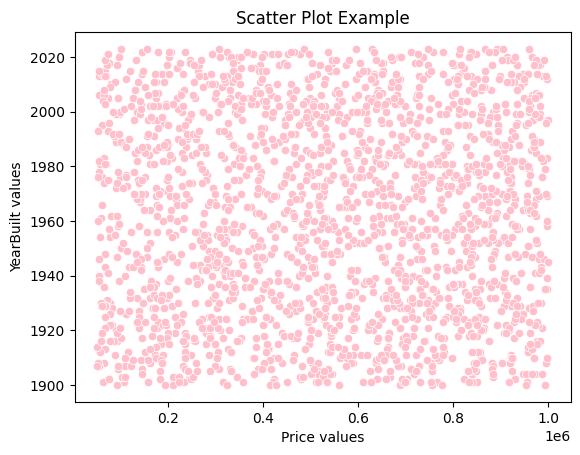

In [226]:
price_year=df.groupby(['Price'])['YearBuilt'].value_counts()
price_year
sns.scatterplot(x='Price', y='YearBuilt', data=df, color='pink', marker='o')

plt.title('Scatter Plot Example')
plt.xlabel('Price values')
plt.ylabel('YearBuilt values')
plt.show()

In [227]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [228]:
df.groupby(['Location'])['Price'].value_counts()

Location  Price 
Downtown  51845     1
          53052     1
          53515     1
          56611     1
          60236     1
                   ..
Urban     994889    1
          996931    1
          997226    1
          997719    1
          999453    1
Name: count, Length: 2000, dtype: int64

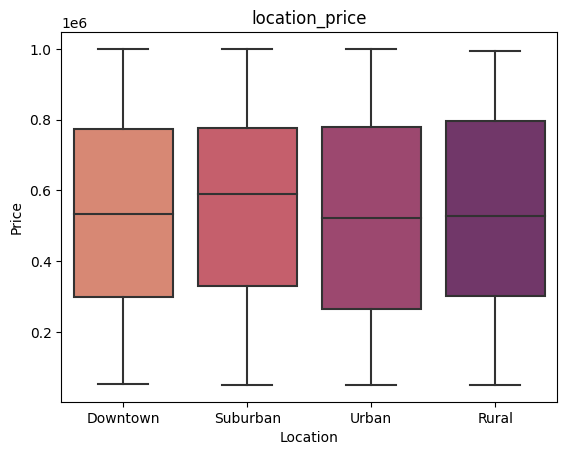

In [229]:
location_price=df.groupby(['Location'])['Price'].value_counts()
location_price
sns.boxplot(x='Location', y='Price', data=df,palette='flare')
plt.title("location_price")
plt.show()

In [230]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [231]:
df.groupby(['Location'])['Condition'].value_counts()

Location  Condition
Downtown  Excellent    153
          Fair         137
          Good         136
          Poor         132
Rural     Fair         132
          Poor         122
          Excellent    120
          Good         100
Suburban  Fair         127
          Poor         123
          Excellent    122
          Good         111
Urban     Poor         130
          Fair         125
          Excellent    116
          Good         114
Name: count, dtype: int64

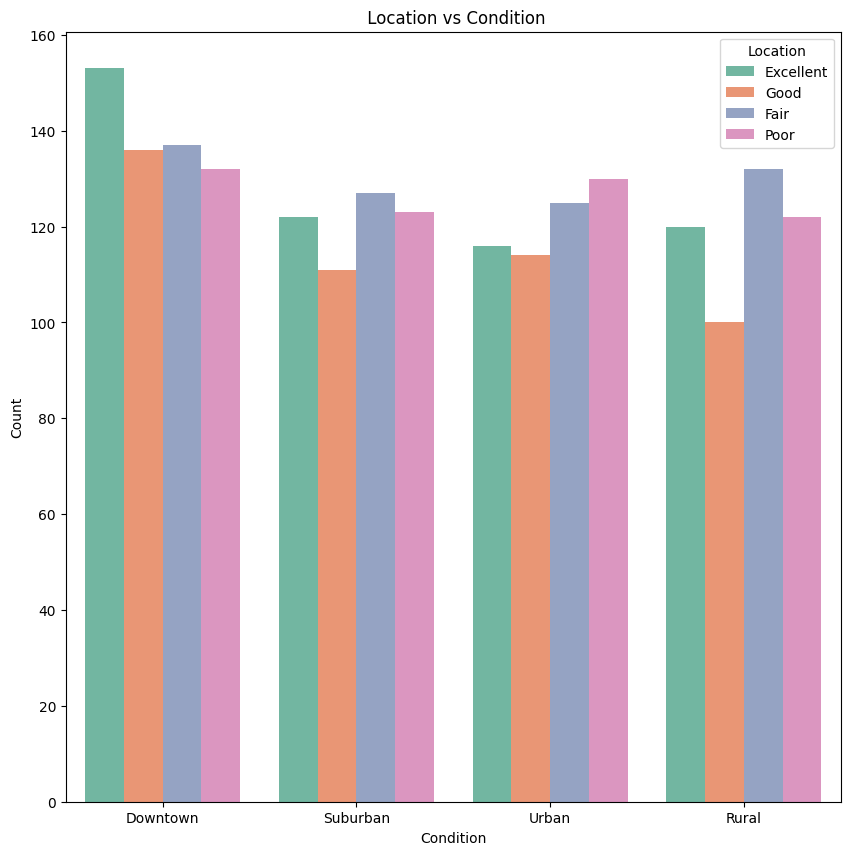

In [232]:
Location_condition=df.groupby(['Location'])['Condition'].value_counts() 
Location_condition
plt.figure(figsize=(10,10))

sns.countplot(data=df, x='Location', hue='Condition', palette='Set2')
plt.title(" Location vs Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Location")
plt.show()

In [233]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [234]:
df.groupby(['Condition'])['Garage'].value_counts()

Condition  Garage
Excellent  No        290
           Yes       221
Fair       No        261
           Yes       260
Good       Yes       233
           No        228
Poor       No        259
           Yes       248
Name: count, dtype: int64

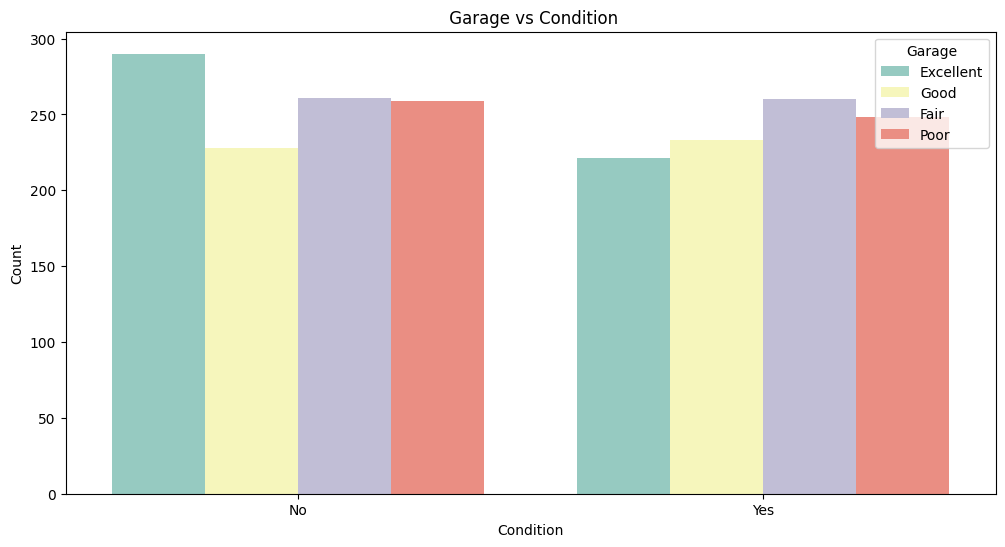

In [235]:
Garage_condition=df.groupby(['Garage'])['Condition'].value_counts() 
Garage_condition
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Garage', hue='Condition', palette='Set3')
plt.title(" Garage vs Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.legend(title="Garage")
plt.show()

In [236]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [237]:
df.groupby(['Condition'])['Price'].value_counts()

Condition  Price 
Excellent  53212     1
           53743     1
           54329     1
           54369     1
           55310     1
                    ..
Poor       994699    1
           994889    1
           996931    1
           997226    1
           997719    1
Name: count, Length: 2000, dtype: int64

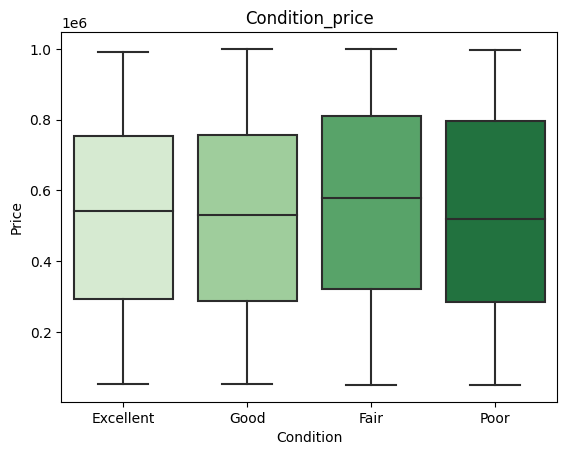

In [238]:
Condition_price=df.groupby(['Condition'])['Price'].value_counts()
Condition_price
sns.boxplot(x='Condition', y='Price', data=df,palette='Greens')
plt.title("Condition_price")
plt.show()

In [239]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [240]:
df.groupby(['Garage'])['Price'].value_counts()

Garage  Price 
No      50064     1
        51082     1
        51845     1
        52024     1
        53052     1
                 ..
Yes     997176    1
        997226    1
        997719    1
        998128    1
        999453    1
Name: count, Length: 2000, dtype: int64

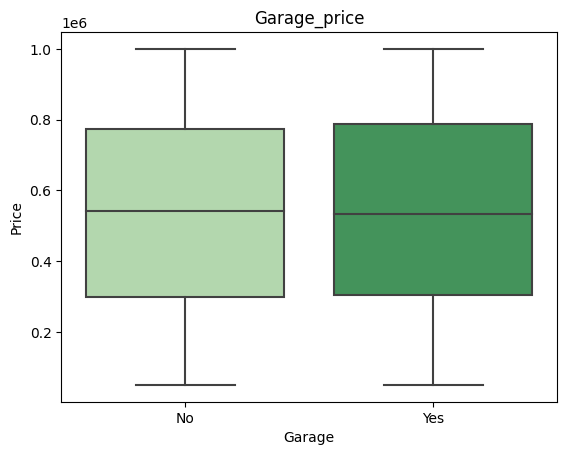

In [241]:
Garage_price=df.groupby(['Garage'])['Price'].value_counts()
Garage_price
sns.boxplot(x='Garage', y='Price', data=df,palette='Greens')
plt.title("Garage_price")
plt.show()

In [242]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


IndexError: Column(s) Floors already selected

In [243]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [244]:
X = df.drop(columns=['Price'])
y = df['Price']
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,Downtown,Excellent,No
1,4272,5,4,3,1958,Downtown,Excellent,No
2,3592,2,2,3,1938,Downtown,Good,No
3,966,4,2,2,1902,Suburban,Fair,Yes
4,4926,1,4,2,1975,Downtown,Fair,Yes
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No
1996,3046,5,2,1,2019,Suburban,Poor,Yes
1997,1062,5,1,2,1903,Rural,Poor,No
1998,4062,3,1,2,1936,Urban,Excellent,Yes


In [245]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [246]:
X.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,Downtown,Excellent,No
1,4272,5,4,3,1958,Downtown,Excellent,No
2,3592,2,2,3,1938,Downtown,Good,No
3,966,4,2,2,1902,Suburban,Fair,Yes
4,4926,1,4,2,1975,Downtown,Fair,Yes


In [247]:
encoder = LabelEncoder()

X['Location'] = encoder.fit_transform(X['Location'])
X['Condition'] = encoder.fit_transform(X['Condition'])
X['Garage'] = encoder.fit_transform(X['Garage'])

In [248]:
X.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,0,0,0
1,4272,5,4,3,1958,0,0,0
2,3592,2,2,3,1938,0,2,0
3,966,4,2,2,1902,2,1,1
4,4926,1,4,2,1975,0,1,1


In [249]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,0,0,0
1,4272,5,4,3,1958,0,0,0
2,3592,2,2,3,1938,0,2,0
3,966,4,2,2,1902,2,1,1
4,4926,1,4,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0
1996,3046,5,2,1,2019,2,3,1
1997,1062,5,1,2,1903,1,3,0
1998,4062,3,1,2,1936,3,0,1


In [250]:
df.isna().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [251]:
X[['Area']].shape

(2000, 1)

In [252]:
scaler = MinMaxScaler()

X['Area'] = scaler.fit_transform(X[['Area']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,5,4,3,1970,0,0,0
1,0.838373,5,4,3,1958,0,0,0
2,0.687194,2,2,3,1938,0,2,0
3,0.103379,4,2,2,1902,2,1,1
4,0.983771,1,4,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,0.998888,5,4,3,1923,2,3,0
1996,0.565807,5,2,1,2019,2,3,1
1997,0.124722,5,1,2,1903,1,3,0
1998,0.791685,3,1,2,1936,3,0,1


In [253]:
X[['Bedrooms']].shape

(2000, 1)

In [254]:
scaler = MinMaxScaler()

X['Bedrooms'] = scaler.fit_transform(X[['Bedrooms']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,4,3,1970,0,0,0
1,0.838373,1.00,4,3,1958,0,0,0
2,0.687194,0.25,2,3,1938,0,2,0
3,0.103379,0.75,2,2,1902,2,1,1
4,0.983771,0.00,4,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,4,3,1923,2,3,0
1996,0.565807,1.00,2,1,2019,2,3,1
1997,0.124722,1.00,1,2,1903,1,3,0
1998,0.791685,0.50,1,2,1936,3,0,1


In [255]:
scaler = MinMaxScaler()

X['Bathrooms'] = scaler.fit_transform(X[['Bathrooms']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,3,1970,0,0,0
1,0.838373,1.00,1.000000,3,1958,0,0,0
2,0.687194,0.25,0.333333,3,1938,0,2,0
3,0.103379,0.75,0.333333,2,1902,2,1,1
4,0.983771,0.00,1.000000,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,3,1923,2,3,0
1996,0.565807,1.00,0.333333,1,2019,2,3,1
1997,0.124722,1.00,0.000000,2,1903,1,3,0
1998,0.791685,0.50,0.000000,2,1936,3,0,1


In [256]:
scaler = MinMaxScaler()

X['Floors'] = scaler.fit_transform(X[['Floors']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,1970,0,0,0
1,0.838373,1.00,1.000000,1.0,1958,0,0,0
2,0.687194,0.25,0.333333,1.0,1938,0,2,0
3,0.103379,0.75,0.333333,0.5,1902,2,1,1
4,0.983771,0.00,1.000000,0.5,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,1923,2,3,0
1996,0.565807,1.00,0.333333,0.0,2019,2,3,1
1997,0.124722,1.00,0.000000,0.5,1903,1,3,0
1998,0.791685,0.50,0.000000,0.5,1936,3,0,1


In [257]:
scaler = MinMaxScaler()

X['YearBuilt'] = scaler.fit_transform(X[['YearBuilt']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,0.569106,0,0,0
1,0.838373,1.00,1.000000,1.0,0.471545,0,0,0
2,0.687194,0.25,0.333333,1.0,0.308943,0,2,0
3,0.103379,0.75,0.333333,0.5,0.016260,2,1,1
4,0.983771,0.00,1.000000,0.5,0.609756,0,1,1
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,0.186992,2,3,0
1996,0.565807,1.00,0.333333,0.0,0.967480,2,3,1
1997,0.124722,1.00,0.000000,0.5,0.024390,1,3,0
1998,0.791685,0.50,0.000000,0.5,0.292683,3,0,1


In [258]:
X[['Garage']].shape

(2000, 1)

In [259]:
X['Garage'] = pd.to_numeric(X['Garage'], errors='coerce')
X['Garage'] = X['Garage'].fillna(0)
scaler = MinMaxScaler()
X['Garage'] = scaler.fit_transform(X[['Garage']])
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,0.569106,0,0,0.0
1,0.838373,1.00,1.000000,1.0,0.471545,0,0,0.0
2,0.687194,0.25,0.333333,1.0,0.308943,0,2,0.0
3,0.103379,0.75,0.333333,0.5,0.016260,2,1,1.0
4,0.983771,0.00,1.000000,0.5,0.609756,0,1,1.0
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,0.186992,2,3,0.0
1996,0.565807,1.00,0.333333,0.0,0.967480,2,3,1.0
1997,0.124722,1.00,0.000000,0.5,0.024390,1,3,0.0
1998,0.791685,0.50,0.000000,0.5,0.292683,3,0,1.0


**Data Splitting**

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)
X_train


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
668,0.916407,0.50,0.000000,0.0,0.162602,3,1,1.0
1345,0.894842,1.00,0.000000,0.0,0.886179,3,1,1.0
373,0.299466,0.75,0.000000,1.0,0.626016,0,3,1.0
1388,0.615162,1.00,0.000000,0.0,0.634146,3,0,1.0
132,0.833037,0.75,1.000000,0.5,0.918699,1,0,0.0
...,...,...,...,...,...,...,...,...
1599,0.620720,0.00,0.666667,0.5,0.569106,1,1,1.0
1862,0.871054,1.00,0.666667,0.5,0.154472,0,0,0.0
1361,0.218542,1.00,0.666667,0.0,0.146341,1,3,1.0
1547,0.586483,1.00,0.333333,1.0,0.569106,0,0,1.0


In [261]:
[1, 2, 3, 4, 5, 6]
rs=42

[4, 5, 3, 1, 2, 6]

rs=3
[5, 6, 4, 3, 1, 2]

[5, 6, 4, 3, 1, 2]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [263]:
X_test.shape

(400, 8)

In [264]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [265]:
y_pred = lr.predict(X_test)
y_pred

array([510844.55800609, 539418.87521843, 502542.9891788 , 560243.21537465,
       573676.09846645, 547450.38288388, 547911.36773467, 546992.57655005,
       562122.64093663, 568418.93231839, 543981.04201363, 568581.48917716,
       494180.93154274, 534369.80109663, 518672.2980485 , 533128.46015755,
       555154.11364786, 553804.89986875, 558980.34324236, 511668.88047104,
       539869.84134873, 530844.60400111, 527257.5665389 , 571513.68736262,
       555171.48683593, 532879.07240733, 515804.34515504, 517839.89088436,
       532023.74891802, 500256.21730707, 494862.38773326, 548059.5947312 ,
       542507.97281599, 570397.41193111, 524177.85942732, 488534.72921744,
       567201.35623307, 583701.76224155, 515786.43837086, 507811.07698988,
       499911.86352156, 521901.32428546, 521299.52562298, 538833.24606057,
       546811.39914863, 543351.32301536, 560351.23630284, 523613.18865934,
       551798.1481872 , 541335.07913986, 499705.44623932, 531759.01289588,
       561999.12398141, 5

In [266]:
print(mean_squared_error(y_test, y_pred))

78729422262.64821


In [267]:
y_test

1860    514764
353     694256
1333     66375
905     650243
1289    223285
         ...  
965     386940
1284    632570
1739    494049
261     562193
535     447530
Name: Price, Length: 400, dtype: int64

In [268]:
print(mean_absolute_error(y_test, y_pred))


244419.99901363705


In [269]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

SGDRegressor()

In [270]:
y_pred = sgd.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

245146.77224140923


In [271]:
print(mean_squared_error(y_test, y_pred))

79273742231.01662


In [272]:
lasso = Lasso()

lasso.fit(X_train, y_train)

Lasso()

In [273]:
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


244419.32596720447


In [274]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [275]:
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

244409.1647083653


In [276]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf') 
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print(" SVR Results:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

 SVR Results:
R² Score: -0.0013340041388230084
RMSE: 279110.39478876546


In [277]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearSVR(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(" LinearSVR Results:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

 LinearSVR Results:
R²: -3.7766331310840107
RMSE: 609603.5284245614


In [278]:
print(y.describe())

count      2000.000000
mean     537676.855000
std      276428.845719
min       50005.000000
25%      300098.000000
50%      539254.000000
75%      780086.000000
max      999656.000000
Name: Price, dtype: float64


In [279]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("DecisionTreeRegressor R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

DecisionTreeRegressor R2: -1.1738858808215347
RMSE: 411249.04238656285


In [280]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print("BaggingRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

BaggingRegressor Results:
R² Score: -0.1656002393091196
RMSE: 301135.07457744586


In [281]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RandomForestRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RandomForestRegressor Results:
R² Score: -0.09928111067470757
RMSE: 292442.7852154094


In [282]:

et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
print("ExtraTreesRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

ExtraTreesRegressor Results:
R² Score: -0.2735259663555112
RMSE: 314767.89587270736


In [283]:


xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("XGBRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

XGBRegressor Results:
R² Score: -0.3554422363977625
RMSE: 324733.45703536377


In [284]:
X.dtypes

Area         float64
Bedrooms     float64
Bathrooms    float64
Floors       float64
YearBuilt    float64
Location       int64
Condition      int64
Garage       float64
dtype: object

In [285]:
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)
print("CatBoostRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))

CatBoostRegressor Results:
R² Score: -0.1569703626868888
RMSE: 300018.2308615312


In [286]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print(" LGBMRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 536183.700000
 LGBMRegressor Results:
R² Score: -0.16001957849120263
RMSE: 300413.32238561433


In [287]:
stacking_reg = StackingRegressor(
    estimators=[
        ('ridge', Ridge()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('lgbm', LGBMRegressor(random_state=42))],
    final_estimator=LinearRegression())
stacking_reg.fit(X_train, y_train)
y_pred_stack = stacking_reg.predict(X_test)
print(" StackingRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred_stack))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 536183.700000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 1280, number of used features: 8
[LightGBM] [Info] Start training from score 532718.951562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1280, number of used features: 8
[LightGBM] [Info] Start tr

In [288]:
voting_reg = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('ridge', Ridge())])
voting_reg.fit(X_train, y_train)
y_pred_vote = voting_reg.predict(X_test)
print(" VotingRegressor Results:")
print("R² Score:", r2_score(y_test, y_pred_vote))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_vote)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] Start training from score 536183.700000
 VotingRegressor Results:
R² Score: -0.06208347369699152
RMSE: 287452.3439528217


In [289]:
log_model = LogisticRegression(max_iter=10)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

 Accuracy: 0.0
 Classification Report:
               precision    recall  f1-score   support

       51082       0.00      0.00      0.00       1.0
       51845       0.00      0.00      0.00       1.0
       52631       0.00      0.00      0.00       1.0
       53052       0.00      0.00      0.00       0.0
       53657       0.00      0.00      0.00       1.0
       54090       0.00      0.00      0.00       1.0
       56611       0.00      0.00      0.00       1.0
       57176       0.00      0.00      0.00       0.0
       59387       0.00      0.00      0.00       0.0
       59765       0.00      0.00      0.00       1.0
       61952       0.00      0.00      0.00       1.0
       62875       0.00      0.00      0.00       1.0
       63338       0.00      0.00      0.00       0.0
       64407       0.00      0.00      0.00       1.0
       64568       0.00      0.00      0.00       0.0
       66220       0.00      0.00      0.00       1.0
       66375       0.00      0.00      0.

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e521d245260> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e521d2dafc0> (for post_execute):


KeyboardInterrupt: 

In [290]:
print(X.dtypes)
print(X.head())
print(y.value_counts())


Area         float64
Bedrooms     float64
Bathrooms    float64
Floors       float64
YearBuilt    float64
Location       int64
Condition      int64
Garage       float64
dtype: object
       Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0  0.190974      1.00   1.000000     1.0   0.569106         0          0   
1  0.838373      1.00   1.000000     1.0   0.471545         0          0   
2  0.687194      0.25   0.333333     1.0   0.308943         0          2   
3  0.103379      0.75   0.333333     0.5   0.016260         2          1   
4  0.983771      0.00   1.000000     0.5   0.609756         0          1   

   Garage  
0     0.0  
1     0.0  
2     0.0  
3     1.0  
4     1.0  
Price
959222    2
149919    1
135687    1
386433    1
77597     1
         ..
536160    1
558350    1
81817     1
55310     1
482525    1
Name: count, Length: 1999, dtype: int64


In [291]:
X = X.fillna(0)
X


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,0.569106,0,0,0.0
1,0.838373,1.00,1.000000,1.0,0.471545,0,0,0.0
2,0.687194,0.25,0.333333,1.0,0.308943,0,2,0.0
3,0.103379,0.75,0.333333,0.5,0.016260,2,1,1.0
4,0.983771,0.00,1.000000,0.5,0.609756,0,1,1.0
...,...,...,...,...,...,...,...,...
1995,0.998888,1.00,1.000000,1.0,0.186992,2,3,0.0
1996,0.565807,1.00,0.333333,0.0,0.967480,2,3,1.0
1997,0.124722,1.00,0.000000,0.5,0.024390,1,3,0.0
1998,0.791685,0.50,0.000000,0.5,0.292683,3,0,1.0


In [292]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNeighborsClassifier Results:")
print("R² Score:", r2_score(y_test, y_pred_vote))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_vote)))

KNeighborsClassifier Results:
R² Score: -0.06208347369699152
RMSE: 287452.3439528217


the error happened because dataset is so small i chechked if i have string and i dont have any string


In [293]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc_model = SVC(kernel='poly')  
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)
print(" SVC Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

 SVC Results:
Accuracy: 0.0
              precision    recall  f1-score   support

       51082       0.00      0.00      0.00       1.0
       51845       0.00      0.00      0.00       1.0
       52631       0.00      0.00      0.00       1.0
       53212       0.00      0.00      0.00       0.0
       53657       0.00      0.00      0.00       1.0
       54090       0.00      0.00      0.00       1.0
       56611       0.00      0.00      0.00       1.0
       57176       0.00      0.00      0.00       0.0
       59765       0.00      0.00      0.00       1.0
       61952       0.00      0.00      0.00       1.0
       62875       0.00      0.00      0.00       1.0
       63698       0.00      0.00      0.00       0.0
       64407       0.00      0.00      0.00       1.0
       66220       0.00      0.00      0.00       1.0
       66375       0.00      0.00      0.00       1.0
       66488       0.00      0.00      0.00       1.0
       66575       0.00      0.00      0.00       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearSVC(max_iter=10000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(" LinearSVC Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - LinearSVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 LinearSVC Results:
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

       51082       0.00      0.00      0.00       1.0
       51845       0.00      0.00      0.00       1.0
       52631       0.00      0.00      0.00       1.0
       53657       0.00      0.00      0.00       1.0
       54090       0.00      0.00      0.00       1.0
       55310       0.00      0.00      0.00       0.0
       56611       0.00      0.00      0.00       1.0
       59765       0.00      0.00      0.00       1.0
       60236       0.00      0.00      0.00       0.0
       61755       0.00      0.00      0.00       0.0
       61952       0.00      0.00      0.00       1.0
       62875       0.00      0.00      0.00       1.0
       64407       0.00      0.00      0.00       1.0
       64568       0.00      0.00      0.00       0.0
       66220       0.00      0.00      0.00       1.0
       66375       0.00      0.00      0.00       1.0
       66473       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e521d245260> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e521d2dafc0> (for post_execute):


KeyboardInterrupt: 

In [312]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNeighborsClassifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNeighborsClassifier Results:
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

       50064       0.00      0.00      0.00       0.0
       51082       0.00      0.00      0.00       1.0
       51845       0.00      0.00      0.00       1.0
       52024       0.00      0.00      0.00       0.0
       52631       0.00      0.00      0.00       1.0
       53052       0.00      0.00      0.00       0.0
       53657       0.00      0.00      0.00       1.0
       53743       0.00      0.00      0.00       0.0
       54090       0.00      0.00      0.00       1.0
       54369       0.00      0.00      0.00       0.0
       56611       0.00      0.00      0.00       1.0
       58981       0.00      0.00      0.00       0.0
       59765       0.00      0.00      0.00       1.0
       60002       0.00      0.00      0.00       0.0
       61755       0.00      0.00      0.00       0.0
       61952       0.00      0.00      0.00       1.0
       62875

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [311]:
X.isnull().sum()

Area     0
Price    0
dtype: int64

In [310]:
X = X.fillna(0)

In [309]:
print(y_test.value_counts())

Price
514764    1
800639    1
215369    1
591285    1
526908    1
         ..
336045    1
589180    1
311538    1
617456    1
447530    1
Name: count, Length: 400, dtype: int64


In [308]:
print(X_train.shape, X_test.shape)
print(X_train.head())
print(X_train.describe())

(1600, 2) (400, 2)
     Area   Price
968  4483  434325
240  1062  614772
819  1422  922811
692  2658  794314
420  3286  796988
              Area          Price
count  1600.000000    1600.000000
mean   2773.721875  536183.700000
std    1301.146750  275780.809857
min     501.000000   50005.000000
25%    1636.000000  299127.500000
50%    2774.000000  533465.500000
75%    3874.500000  781022.000000
max    4999.000000  999453.000000


In [307]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Dummy Accuracy:", dummy.score(X_test, y_test))

Dummy Accuracy: 0.0


In [306]:
df.shape

(2000, 10)

In [305]:
X = X.fillna(0)

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("DecisionTreeClassifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

DecisionTreeClassifier Results:
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

       51082       0.00      0.00      0.00       1.0
       51845       0.00      0.00      0.00       1.0
       52024       0.00      0.00      0.00       0.0
       52631       0.00      0.00      0.00       1.0
       53657       0.00      0.00      0.00       1.0
       54090       0.00      0.00      0.00       1.0
       56611       0.00      0.00      0.00       1.0
       59765       0.00      0.00      0.00       1.0
       61952       0.00      0.00      0.00       1.0
       62875       0.00      0.00      0.00       1.0
       64407       0.00      0.00      0.00       1.0
       66220       0.00      0.00      0.00       1.0
       66375       0.00      0.00      0.00       1.0
       66488       0.00      0.00      0.00       1.0
       66738       0.00      0.00      0.00       1.0
       67215       0.00      0.00      0.00       1.0
       679

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [304]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Cluster
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,2
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0
2,3592,2,2,3,1938,Downtown,Good,No,266746,2
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,2
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,3


In [299]:
X = df[['Area', 'Price']]

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

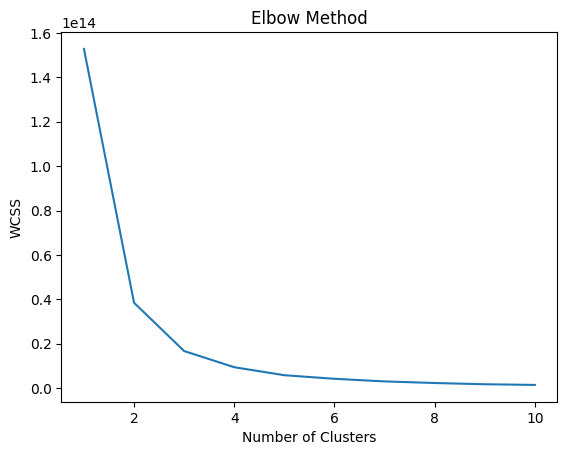

In [300]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [301]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [302]:
df['Cluster'] = y_kmeans

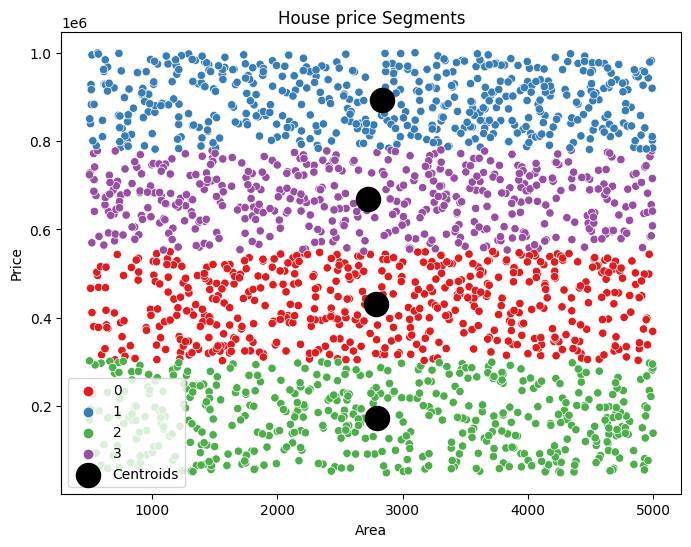

In [303]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Area', y='Price', hue='Cluster', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroids')
plt.title("House price Segments")
plt.legend()
plt.show()